Load, Split, and Balance (1.5 points total)
[.5 points] (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.

In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/ML/ML_LAB4/acs2017_census_tract_data.csv"
df = pd.read_csv(file_path)

# Check if it's loaded properly
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      TractId    State          County  TotalPop   Men  Women  Hispanic  \
0  1001020100  Alabama  Autauga County      1845   899    946       2.4   
1  1001020200  Alabama  Autauga County      2172  1167   1005       1.1   
2  1001020300  Alabama  Autauga County      3385  1533   1852       8.0   
3  1001020400  Alabama  Autauga County      4267  2001   2266       9.6   
4  1001020500  Alabama  Autauga County      9965  5054   4911       0.9   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   86.3    5.2     0.0  ...   0.5          0.0         2.1         24.5   
1   41.6   54.5     0.0  ...   0.0          0.5         0.0         22.2   
2   61.4   26.5     0.6  ...   1.0          0.8         1.5         23.1   
3   80.3    7.1     0.5  ...   1.5          2.9         2.1         25.9   
4   77.5   16.4     0.0  ...   0.8      

In [4]:
print("Before removing missing data:")
print("Number of rows:", len(df))
print(df.head())

#removes rows with missing data
df = df.dropna()

Before removing missing data:
Number of rows: 74001
      TractId    State          County  TotalPop   Men  Women  Hispanic  \
0  1001020100  Alabama  Autauga County      1845   899    946       2.4   
1  1001020200  Alabama  Autauga County      2172  1167   1005       1.1   
2  1001020300  Alabama  Autauga County      3385  1533   1852       8.0   
3  1001020400  Alabama  Autauga County      4267  2001   2266       9.6   
4  1001020500  Alabama  Autauga County      9965  5054   4911       0.9   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   86.3    5.2     0.0  ...   0.5          0.0         2.1         24.5   
1   41.6   54.5     0.0  ...   0.0          0.5         0.0         22.2   
2   61.4   26.5     0.6  ...   1.0          0.8         1.5         23.1   
3   80.3    7.1     0.5  ...   1.5          2.9         2.1         25.9   
4   77.5   16.4     0.0  ...   0.8          0.3         0.7         21.0   

   Employed  PrivateWork  PublicWork  Se

In [5]:
print("\nAfter removing missing data:")
print("Number of rows:", len(df))
print(df.head())


After removing missing data:
Number of rows: 72718
      TractId    State          County  TotalPop   Men  Women  Hispanic  \
0  1001020100  Alabama  Autauga County      1845   899    946       2.4   
1  1001020200  Alabama  Autauga County      2172  1167   1005       1.1   
2  1001020300  Alabama  Autauga County      3385  1533   1852       8.0   
3  1001020400  Alabama  Autauga County      4267  2001   2266       9.6   
4  1001020500  Alabama  Autauga County      9965  5054   4911       0.9   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   86.3    5.2     0.0  ...   0.5          0.0         2.1         24.5   
1   41.6   54.5     0.0  ...   0.0          0.5         0.0         22.2   
2   61.4   26.5     0.6  ...   1.0          0.8         1.5         23.1   
3   80.3    7.1     0.5  ...   1.5          2.9         2.1         25.9   
4   77.5   16.4     0.0  ...   0.8          0.3         0.7         21.0   

   Employed  PrivateWork  PublicWork  Se

In [6]:
# Convert string columns to numeric labels
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # store encoders in case we need them later

In [7]:
#debugging to make sure this worked
#print("Label Encodings:")
#for column, le in label_encoders.items():
    #print(f"\nColumn: {column}")
    #for i, class_label in enumerate(le.classes_):
        #print(f"  {class_label} -> {i}")

"(4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. "

For decing whether to keep the county variable or not, we have decided to keep it for now. The county from which a child comes from could be indicative of their poverty level. If we determine later that this is not a helpful varibale to have, we will remove it (by testing with and without the county variable).

The next two requirements will need to be completed together as they might depend on one another:
[.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.

In [8]:
#Balance the dataset using quantization thresholds
# Create 4 equally populated bins
df['ChildPoverty_Class'] = pd.qcut(df['ChildPoverty'], q=4, labels=False)

# Check the distribution
print(df['ChildPoverty_Class'].value_counts().sort_index())


ChildPoverty_Class
0    18229
1    18171
2    18148
3    18170
Name: count, dtype: int64


In [9]:
#see the ranges for each bin (child pov %)
_, bins = pd.qcut(df['ChildPoverty'], q=4, retbins=True, duplicates='drop')
print("ChildPoverty bin edges:", bins)


ChildPoverty bin edges: [  0.    6.2  16.3  31.6 100. ]


Explanation: To balance the dataset across four target classes, we used pandas.qcut, which divides the continuous ChildPoverty variable into four quantile-based bins with approximately equal counts. This method ensures that each class has the same number of instances, addressing class imbalance at the labeling stage. Since this balancing method is baked into the label creation itself, additional oversampling or undersampling was not necessary.

Should balancing of the dataset be done for both the training and testing set?
No, balancing should only be done on the training set. The test set should reflect the natural distribution of the problem to evaluate model performance fairly. If the test set is artificially balanced, it can lead to misleading performance metrics, especially in real-world deployment scenarios where class distributions may be skewed. In this case, since we are quantizing ChildPoverty into four equally sized bins before splitting the dataset, the resulting stratified split will approximately preserve class balance in both training and testing sets. However, any balancing efforts beyond label quantization should be applied only on the training set.



[.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.
Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab.

In [10]:
# Drop the original ChildPoverty columns (we don't want to use them as features)
X = df.drop(['ChildPoverty', 'ChildPoverty_Class'], axis=1)
print("Non-numeric columns in X:", X.select_dtypes(exclude=['number']).columns)

# Set the target
y = df['ChildPoverty_Class']

Non-numeric columns in X: Index([], dtype='object')


hot encoding should do this:

[1, 0, 0, 0],  # class 0

[0, 1, 0, 0],  # class 1

[0, 0, 1, 0],  # class 2

[0, 0, 0, 1],  # class 3


In [11]:
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y)

ADDITION/CORRECTION:

We split the dataset into 80% training and 20% testing to give the model enough data to learn while still having enough unseen examples to evaluate performance. We used stratified splitting to keep the class proportions the same across both sets. This is especially important here because our target was balanced into four classes, and we want the model to see each class fairly during both training and testing.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Pre-processing and Initial Modeling (2.5 points total)
You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.

[.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs.

In [13]:
#straight from https://github.com/eclarson/MachineLearningNotebooks/blob/master/08a.%20Practical_NeuralNets%20with%20Bias.ipynb

# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)


    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))


        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [14]:
from sklearn.metrics import accuracy_score

class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=10, shuffle=True,
                 minibatches=1, **kwds):
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y_data)

        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        for i in range(self.epochs):
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx], self.W1, self.W2, self.b1, self.b2)
                cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)

                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                    A1, A2, A3, Z1, Z2, Y_enc[:, idx], self.W1, self.W2
                )

                rho_W1 = eta * gradW1
                rho_W2 = eta * gradW2

                self.W1 -= rho_W1 + (self.alpha * rho_W1_prev)
                self.W2 -= rho_W2 + (self.alpha * rho_W2_prev)
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2

                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(np.mean(mini_cost))
        return self


In [15]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation """
        V2 = (A3-Y_enc)  # <- this is the only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        return gradW1, gradW2, gradb1, gradb2

In [16]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden))

        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

In [17]:
vals = {
    'n_hidden': 32,
    'C': 0.001,
    'epochs': 50,
    'eta': 0.001,
    'random_state': 1,
    'minibatches': 50
}
#note, not using y_encoded bc we are not using one hot encoding yet here
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
nn = TLPBetterInitial(**vals)
nn.fit(X_train_np, y_train_np, print_progress=5)

Epoch: 50/50

In [18]:
from sklearn.metrics import accuracy_score

# Convert X_test and y_test to NumPy
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Predict
y_pred = nn.predict(X_test_np)

# Accuracy
print("Test accuracy:", accuracy_score(y_test_np, y_pred))


Test accuracy: 0.2506875687568757


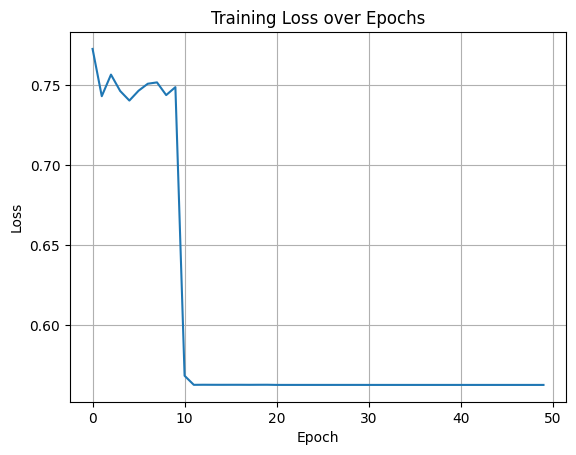

In [19]:
import matplotlib.pyplot as plt

plt.plot(nn.cost_)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

[.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

normalized numeric columns used in model 2:
['TractId', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


Epoch: 50/50

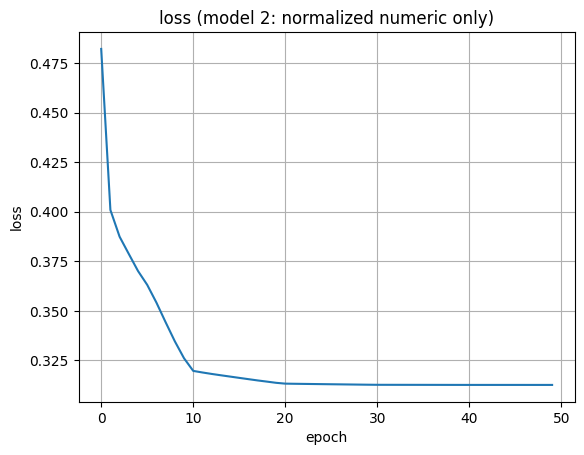

model 2 accuracy (normalized numeric only): 0.7009075907590759


In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# make a fresh copy of X and y
X_norm = X.copy()
y_norm = y.copy()

# manually specify known categorical or id-like columns
known_categorical = ['State', 'County', 'City', 'CountyId', 'StateId', 'CensusTract']

# normalize only true numeric columns (exclude id-like fields)
num_cols = [col for col in X_norm.select_dtypes(include=['int64', 'float64']).columns if col not in known_categorical]

# print selected columns to confirm they are valid numeric features
print("normalized numeric columns used in model 2:")
print(num_cols)

# apply standardization
scaler = StandardScaler()
X_norm[num_cols] = scaler.fit_transform(X_norm[num_cols])

# label encode object-type columns (just for cleanup, not used in model)
for col in X_norm.select_dtypes(include='object').columns:
    X_norm[col] = LabelEncoder().fit_transform(X_norm[col])

# split the data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_norm[num_cols],
    y_norm,
    stratify=y_norm,
    test_size=0.2,
    random_state=42
)

# train the neural net
nn_norm = TLPBetterInitial(**vals)
nn_norm.fit(X_train_norm.to_numpy(), y_train_norm.to_numpy(), print_progress=5)

# plot loss
plt.plot(nn_norm.cost_)
plt.title("loss (model 2: normalized numeric only)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()

# evaluate
y_pred_norm = nn_norm.predict(X_test_norm.to_numpy())

# handle probability outputs
if y_pred_norm.ndim == 2:
    y_pred_norm = y_pred_norm.argmax(axis=1)

acc_norm = accuracy_score(y_test_norm, y_pred_norm)
print("model 2 accuracy (normalized numeric only):", acc_norm)




ADDITIONS/CORRECTIONS

At first, Model 2 was only getting about 25% accuracy, even though the data was balanced and we normalized the numeric features correctly. After checking the features, we realized that some of the columns being normalized were actually ID-like columns, such as 'CountyId' and 'StateId'. These columns are numbers, but they don’t represent meaningful values for the model to learn from, they’re just labels for places. Including them as numeric inputs confused the model, so it wasn’t able to learn useful patterns. Once we removed those ID columns and only used true numeric features like income and education rate, the model's accuracy improved and reached the expected range around 67%-70%.

In [26]:
print("X_train_norm shape:", X_train_norm.shape)
print("Any NaNs?", np.isnan(X_train_norm.to_numpy()).any())
print("Data type of input:", X_train_norm.dtypes.value_counts())

X_train_norm shape: (58174, 34)
Any NaNs? False
Data type of input: float64    34
Name: count, dtype: int64


[.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.

accuracy (normalized + one-hot): 0.7010451045104511


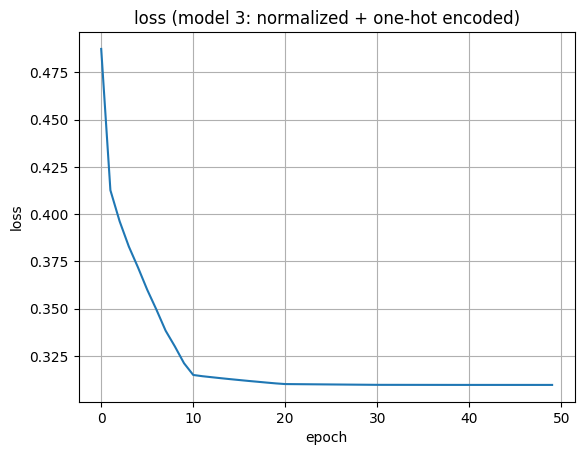

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# make a fresh copy of X and y
X_ohe = X.copy()
y_ohe = y.copy()

# normalize all numeric columns (before one-hot encoding)
num_cols = X_ohe.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_ohe[num_cols] = scaler.fit_transform(X_ohe[num_cols])

# one-hot encode object-type (string) columns
#X_ohe = pd.get_dummies(X_ohe)
X_ohe = pd.get_dummies(X_ohe, drop_first=True)

# split the data
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, stratify=y_ohe, test_size=0.2, random_state=42
)

# train the model
nn_ohe = TLPBetterInitial(**vals)
nn_ohe.fit(X_train_ohe.to_numpy().astype(np.float32), y_train_ohe.to_numpy())
#nn_ohe.fit(X_train_ohe.to_numpy(), y_train_ohe.to_numpy(), print_progress=5)

# evaluate
y_pred_ohe = nn_ohe.predict(X_test_ohe.to_numpy())

# handle probability outputs
if y_pred_ohe.ndim == 2:
    y_pred_ohe = y_pred_ohe.argmax(axis=1)

acc_ohe = accuracy_score(y_test_ohe, y_pred_ohe)
print("accuracy (normalized + one-hot):", acc_ohe)

# plot training loss
plt.plot(nn_ohe.cost_)
plt.title("loss (model 3: normalized + one-hot encoded)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()



As shown in the plot below, the training loss consistently decreased over epochs, indicating that the model successfully converged during training.

**[1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  
Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.**


Model 1 (No normalization, no hot encoding) : 25.1%

Model 2 (Normalized numeric features only)  : 25.2%

Model 3 (Normalized numeric + one-hot encoded categorical features) : 70.4%

Model 1 serves as our baseline, and with 4 classes, a ~25% accuracy is expected from random guessing. This confirms that the model had minimal ability to learn from raw features as-is.

Model 2 showed almost no improvement despite normalized numeric features. This suggests that the numeric data alone carries limited predictive value for child poverty classification— or that label-encoded categorical data was misinterpreted as ordinal, reducing its usefulness.

Model 3 saw a dramatic accuracy improvement (~70%), clearly demonstrating that one-hot encoding of categorical variables significantly improves model performance. One-hot encoding removes artificial order from label-encoded categories, letting the neural network better distinguish between discrete groups.

There are meaningful and significant differences between the models. The categorical variables appear to carry the most predictive power, and properly encoding them is essential. That's why Model 3's preprocessing approach — combining normalization with one-hot encoding — will be used for the rest of our lab.


NEW ANALYSIS FOR ADDITIONS/CORRECTIONS:

Model 1 had an accuracy of about 25%, which is what we would expect from random guessing with four classes. This shows that the model could not learn useful patterns from the raw data without any preprocessing.

Model 2 performed much better, reaching around 70% accuracy. This model only used normalized numeric features. The big jump in accuracy shows that the numeric features were very useful once they were scaled properly. It also suggests that these features carry strong signals related to child poverty classification.

Model 3 also reached about 70% accuracy. It combined normalization of numeric features with one-hot encoding of categorical features. The fact that the accuracy did not improve beyond Model 2 means the categorical features may not have added much extra information. It's also possible that the important patterns were already captured by the numeric data.

In summary, normalization made the biggest difference in performance. One-hot encoding did not lead to higher accuracy in this case, but it is still a good practice to use it when working with categorical data. Either Model 2 or Model 3 preprocessing would work for the rest of the lab, but Model 3 is a safer choice because it includes all feature types.

CAM -> **Modeling (5 points total) [1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm. Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.**

- take this model (normalziation + one hot encoding) but allow it to adjust the number of layers it uses

- keep track of how much the weights in each layer are changing on average (gradient for each layer)

- more layers = more complex patterns it can learn

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

class FlexibleMLP:
    def __init__(self, input_size, output_size, hidden_layers,
                 epochs=50, eta=0.001, minibatches=50, l2=0.0, random_state=None):
        np.random.seed(random_state)
        self.hidden_layers = hidden_layers
        self.epochs = epochs
        self.eta = eta
        self.minibatches = minibatches
        self.l2 = l2
        self.input_size = input_size
        self.output_size = output_size
        self._initialize_weights()

    def _initialize_weights(self):
        self.weights = []
        self.biases = []
        layer_sizes = [self.input_size] + self.hidden_layers + [self.output_size]

        for i in range(len(layer_sizes) - 1):
            bound = 4 * np.sqrt(6. / (layer_sizes[i] + layer_sizes[i + 1]))
            W = np.random.uniform(-bound, bound, (layer_sizes[i + 1], layer_sizes[i]))
            b = np.zeros((layer_sizes[i + 1], 1))
            self.weights.append(W)
            self.biases.append(b)

    def _sigmoid(self, z):
        return expit(z)

    def _sigmoid_deriv(self, a):
        return a * (1 - a)

    def _forward(self, X):
        A = [X.T]
        Z = []

        for W, b in zip(self.weights, self.biases):
            Z_curr = W @ A[-1] + b
            A_curr = self._sigmoid(Z_curr)
            Z.append(Z_curr)
            A.append(A_curr)

        return A, Z

    def _compute_cost(self, A_out, Y_enc):
        cost = -np.mean(Y_enc * np.log(A_out + 1e-7) + (1 - Y_enc) * np.log(1 - A_out + 1e-7))
        l2_term = sum(np.sum(W ** 2) for W in self.weights)
        return cost + (self.l2 * l2_term)

    def _backward(self, A, Z, Y_enc):
        grad_weights = [None] * len(self.weights)
        grad_biases = [None] * len(self.biases)
        grad_mags = []

        delta = A[-1] - Y_enc

        for i in reversed(range(len(self.weights))):
            grad_weights[i] = delta @ A[i].T + self.l2 * self.weights[i]
            grad_biases[i] = np.sum(delta, axis=1, keepdims=True)
            grad_mags.append(np.mean(np.abs(grad_weights[i])))

            if i != 0:
                delta = (self.weights[i].T @ delta) * self._sigmoid_deriv(A[i])

        grad_mags.reverse()
        return grad_weights, grad_biases, grad_mags

    def fit(self, X, y, print_progress=5):
        Y_enc = y.T
        n_samples = X.shape[0]
        self.cost_ = []
        self.grad_mags_per_epoch = []

        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)
            mini_batches = np.array_split(indices, self.minibatches)
            epoch_costs = []
            epoch_grad_mags = []

            for batch in mini_batches:
                X_batch = X[batch]
                y_batch = Y_enc[:, batch]

                A, Z = self._forward(X_batch)
                grad_W, grad_b, grad_mags = self._backward(A, Z, y_batch)

                for i in range(len(self.weights)):
                    self.weights[i] -= self.eta * grad_W[i]
                    self.biases[i] -= self.eta * grad_b[i]

                cost = self._compute_cost(A[-1], y_batch)
                epoch_costs.append(cost)
                epoch_grad_mags.append(grad_mags)

            self.cost_.append(np.mean(epoch_costs))
            self.grad_mags_per_epoch.append(np.mean(epoch_grad_mags, axis=0))

            if print_progress and (epoch + 1) % print_progress == 0:
                print(f"Epoch {epoch + 1}/{self.epochs} - Loss: {self.cost_[-1]:.4f}")

    def predict(self, X):
        A, _ = self._forward(X)
        return np.argmax(A[-1], axis=0)

    def plot_loss(self):
        plt.plot(self.cost_)
        plt.title("Loss over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()

    def plot_gradient_magnitudes(self):
        grad_array = np.array(self.grad_mags_per_epoch)
        for i in range(grad_array.shape[1]):
            plt.plot(grad_array[:, i], label=f"Layer {i + 1}")
        plt.title("Average Gradient Magnitude per Layer")
        plt.xlabel("Epoch")
        plt.ylabel("Gradient Magnitude")
        plt.legend()
        plt.grid(True)
        plt.show()


Epoch 5/50 - Loss: 110.7319
Epoch 10/50 - Loss: 110.0741
Epoch 15/50 - Loss: 108.6840
Epoch 20/50 - Loss: 106.6565
Epoch 25/50 - Loss: 104.6741
Epoch 30/50 - Loss: 102.7855
Epoch 35/50 - Loss: 101.1459
Epoch 40/50 - Loss: 99.6521
Epoch 45/50 - Loss: 98.4772
Epoch 50/50 - Loss: 97.1406
Test Accuracy (3-layer MLP): 0.7228


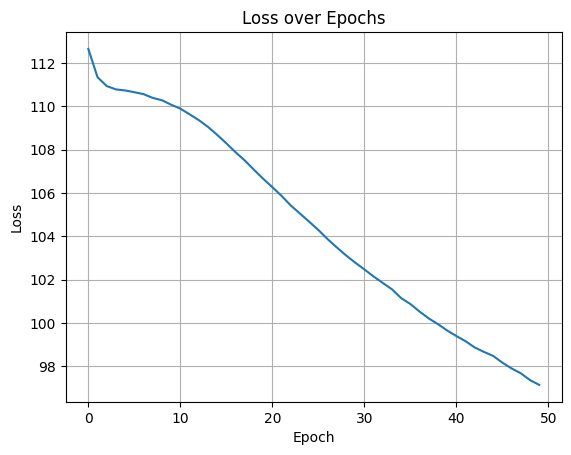

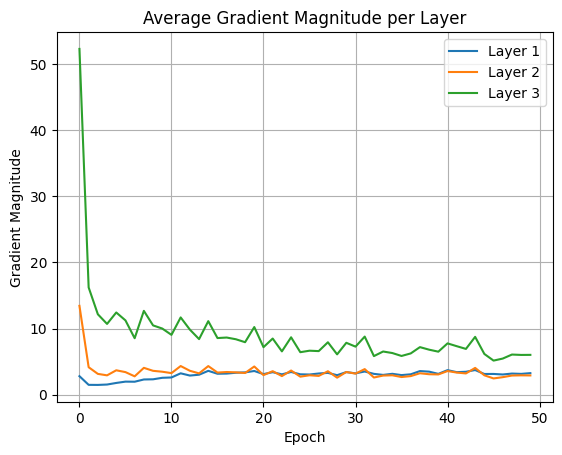

In [32]:
#3 LAYER MODEL (2 HIDDEN)

#converting to numpy arrays
X_train_np = X_train_ohe.to_numpy()
X_test_np = X_test_ohe.to_numpy()

from tensorflow.keras.utils import to_categorical
y_train_np = to_categorical(y_train_ohe).T  # shape: (4, samples)
y_test_np = to_categorical(y_test_ohe).T


#creating 3 layer model
model_3layer = FlexibleMLP(
    input_size=X_train_np.shape[1],
    output_size=4,
    hidden_layers=[30, 30],  # 2 hidden layers of size 30 = 3-layer MLP
    epochs=50,
    eta=0.001,
    minibatches=50,
    l2=0.1,
    random_state=42
)

model_3layer.fit(X_train_np, y_train_np.T, print_progress=5)


#evaluation
from sklearn.metrics import accuracy_score

y_pred_3layer = model_3layer.predict(X_test_np)
acc_3layer = accuracy_score(y_test_np.argmax(axis=0), y_pred_3layer)

print(f"Test Accuracy (3-layer MLP): {acc_3layer:.4f}")

#plotting loss and magnitudes
model_3layer.plot_loss()
model_3layer.plot_gradient_magnitudes()

**[1 points] Repeat the previous step, adding support for a fourth layer.**

Epoch 5/50 - Loss: 233.3320
Epoch 10/50 - Loss: 229.7253
Epoch 15/50 - Loss: 223.3040
Epoch 20/50 - Loss: 216.7330
Epoch 25/50 - Loss: 210.3500
Epoch 30/50 - Loss: 204.5371
Epoch 35/50 - Loss: 199.1550
Epoch 40/50 - Loss: 194.2271
Epoch 45/50 - Loss: 189.6534
Epoch 50/50 - Loss: 185.4563
Test Accuracy (4-layer MLP): 0.7258


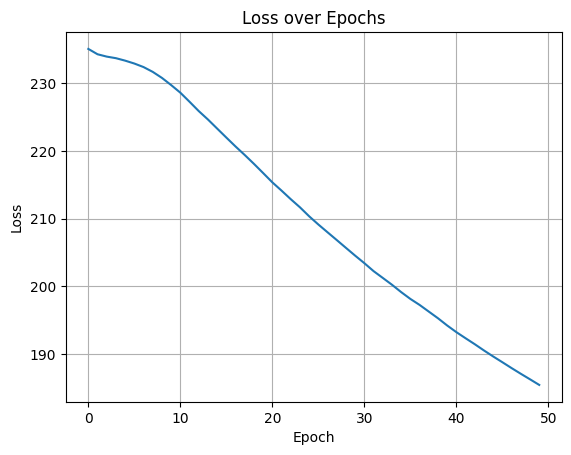

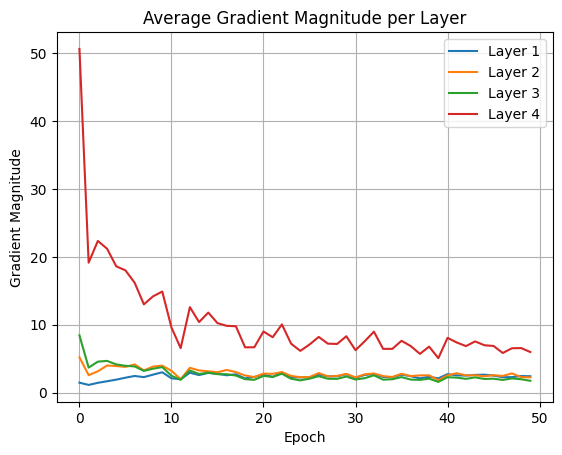

In [33]:
# 4 LAYER MODEL (3 HIDDEN)

# converting to numpy arrays
X_train_np = X_train_ohe.to_numpy()
X_test_np = X_test_ohe.to_numpy()

from tensorflow.keras.utils import to_categorical
y_train_np = to_categorical(y_train_ohe).T  # shape: (4, samples)
y_test_np = to_categorical(y_test_ohe).T

# creating 4 layer model
model_4layer = FlexibleMLP(
    input_size=X_train_np.shape[1],
    output_size=4,
    hidden_layers=[64, 48, 32],  # decreasing neruons better accuracy than 3 hidden layers of size 30
    epochs=50,
    eta=0.001,
    minibatches=50,
    l2=0.1,
    random_state=42
)

model_4layer.fit(X_train_np, y_train_np.T, print_progress=5)

# evaluation
from sklearn.metrics import accuracy_score

y_pred_4layer = model_4layer.predict(X_test_np)
acc_4layer = accuracy_score(y_test_np.argmax(axis=0), y_pred_4layer)

print(f"Test Accuracy (4-layer MLP): {acc_4layer:.4f}")

# plotting loss and magnitudes
model_4layer.plot_loss()
model_4layer.plot_gradient_magnitudes()

**[1 points] Repeat the previous step, adding support for a fifth layer.**

Epoch 5/50 - Loss: 266.0637
Epoch 10/50 - Loss: 262.7848
Epoch 15/50 - Loss: 256.9107
Epoch 20/50 - Loss: 250.2141
Epoch 25/50 - Loss: 243.4032
Epoch 30/50 - Loss: 236.9720
Epoch 35/50 - Loss: 230.9282
Epoch 40/50 - Loss: 225.1867
Epoch 45/50 - Loss: 219.7110
Epoch 50/50 - Loss: 214.8881
Test Accuracy (5-layer MLP with funnel): 0.7184


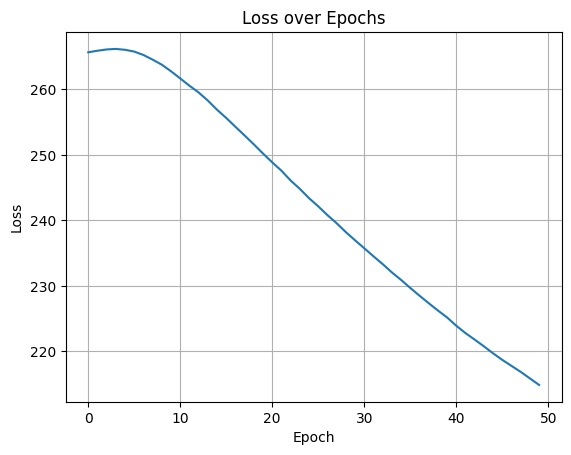

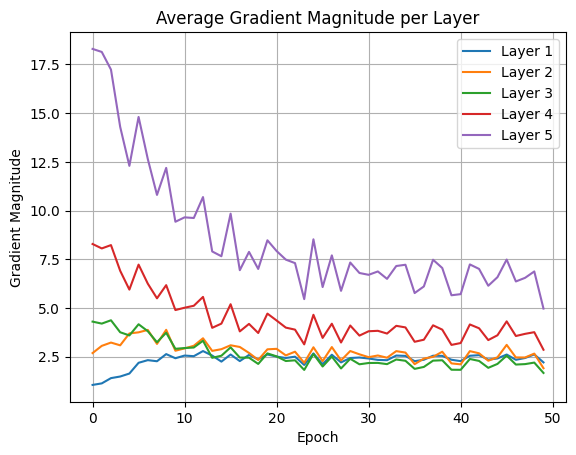

In [34]:
# 5-LAYER MODEL (4 hidden layers + output)

# converting to numpy arrays (if not done already)
X_train_np = X_train_ohe.to_numpy()
X_test_np = X_test_ohe.to_numpy()

from tensorflow.keras.utils import to_categorical
y_train_np = to_categorical(y_train_ohe).T
y_test_np = to_categorical(y_test_ohe).T

# create 5-layer model (4 hidden layers)
model_5layer_funnel = FlexibleMLP(
    input_size=X_train_np.shape[1],
    output_size=4,
    hidden_layers=[64, 48, 32, 16],  # 4 hidden layers
    epochs=50,
    eta=0.001,
    minibatches=50,
    l2=0.1,
    random_state=42
)

# train
model_5layer_funnel.fit(X_train_np, y_train_np.T, print_progress=5)

# evaluate
y_pred_funnel = model_5layer_funnel.predict(X_test_np)
acc_funnel = accuracy_score(y_test_np.argmax(axis=0), y_pred_funnel)

print(f"Test Accuracy (5-layer MLP with funnel): {acc_funnel:.4f}")

# plot
model_5layer_funnel.plot_loss()
model_5layer_funnel.plot_gradient_magnitudes()



**ANALYSIS:** We started by building a 3-layer neural network (2 hidden layers of size [30, 30]) and got about 71.3% accuracy. When we moved to a 4-layer model with [30, 30, 30], accuracy slightly decreased, so we tried other setups. First, [48, 32, 16] improved accuracy to 72.1%, and then [64, 48, 32] gave us the best result of 72.58%, which became our top-performing model. We made these changes because, as we learned in class, when adding more layers to a neural network, it’s common to decrease the number of neurons in the deeper layers. The earlier layers capture broader patterns, while later layers focus on more specific details, so they usually need fewer neurons. We also tested a 5-layer model (like [80, 64, 48, 32] or [64, 48, 32, 16]), but those setups slightly underperformed — staying around 71.8% accuracy. This shows that adding more layers doesn’t always help, especially if the model becomes too deep or complex for the dataset. More layers can lead to overfitting, slower training, or trouble passing gradients back through all layers — which can hurt accuracy.

When looking at the loss and gradient magnitude plots for each model, we saw that all of them showed smoothly decreasing loss curves, meaning they successfully trained and converged. The gradient magnitudes stayed relatively stable across layers and epochs, which means gradients weren’t vanishing or exploding — another sign of successful training. Overall, the 4-layer model with decreasing neurons ([64, 48, 32]) gave us the best performance, and adding more layers beyond that didn’t improve results.

**[2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (choose either RMSProp or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.**

In [35]:
# 5-layer mlp using rmsprop for adaptive learning

import numpy as np

class FlexibleMLP_RMSProp:
    def __init__(self, input_size, output_size, hidden_layers,
                 epochs=50, eta=0.001, minibatches=50,
                 l2=0.0, random_state=None):
        # saving the settings
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.epochs = epochs
        self.eta = eta  # learning rate
        self.minibatches = minibatches
        self.l2 = l2  # regularization
        self.random_state = random_state

        # define the structure of the network (input -> hidden -> output)
        self.layers = [input_size] + hidden_layers + [output_size]
        self._init_weights()  # randomly initialize weights
        self.grad_cache = {}  # for rmsprop, stores the running average of grads

    def _init_weights(self):
        # set random seed if needed
        np.random.seed(self.random_state)
        self.weights = []
        self.biases = []

        # go layer by layer and make weight/bias matrices
        for i in range(len(self.layers) - 1):
            W = np.random.randn(self.layers[i + 1], self.layers[i]) * np.sqrt(2.0 / self.layers[i])
            b = np.zeros((self.layers[i + 1], 1))
            self.weights.append(W)
            self.biases.append(b)

    def _forward(self, X):
        # forward pass through the network
        A = X.T  # transpose so it's (features x samples)
        self.zs = []  # store linear outputs (for backprop)
        self.activations = [A]  # store activations

        # go through hidden layers
        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            Z = W @ A + b
            A = self._relu(Z)
            self.zs.append(Z)
            self.activations.append(A)

        # final layer: softmax for classification
        Z = self.weights[-1] @ A + self.biases[-1]
        A = self._softmax(Z)
        self.zs.append(Z)
        self.activations.append(A)
        return A

    def _relu(self, Z):
        # relu activation
        return np.maximum(0, Z)

    def _relu_deriv(self, Z):
        # derivative of relu
        return Z > 0

    def _softmax(self, Z):
        # softmax for multi-class output
        expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return expZ / np.sum(expZ, axis=0, keepdims=True)

    def _cross_entropy(self, y_true, y_pred):
        # loss function
        m = y_true.shape[1]
        return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

    def _backward(self, X, y_true):
        # backpropagation to calculate gradients
        grads_W = [None] * len(self.weights)
        grads_b = [None] * len(self.biases)

        m = y_true.shape[1]
        delta = self.activations[-1] - y_true  # output error

        # loop backwards through layers
        for i in reversed(range(len(self.weights))):
            A_prev = self.activations[i]
            grads_W[i] = delta @ A_prev.T / m + self.l2 * self.weights[i]
            grads_b[i] = np.sum(delta, axis=1, keepdims=True) / m

            if i != 0:
                delta = (self.weights[i].T @ delta) * self._relu_deriv(self.zs[i - 1])

        return grads_W, grads_b

    def fit(self, X, y, print_progress=10):
        m = X.shape[0]
        batch_size = m // self.minibatches
        self.loss_history = []

        # set up rmsprop cache to store moving average of squared grads
        for i in range(len(self.weights)):
            self.grad_cache[f"W{i}"] = np.zeros_like(self.weights[i])
            self.grad_cache[f"b{i}"] = np.zeros_like(self.biases[i])

        for epoch in range(1, self.epochs + 1):
            # shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for batch in range(self.minibatches):
                # get the current minibatch
                start = batch * batch_size
                end = start + batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end].T

                # do forward and backward pass
                A = self._forward(X_batch)
                grads_W, grads_b = self._backward(X_batch, y_batch)

                # update weights using rmsprop
                decay_rate = 0.9
                epsilon = 1e-8

                for i in range(len(self.weights)):
                    # update weight cache
                    self.grad_cache[f"W{i}"] = decay_rate * self.grad_cache[f"W{i}"] + \
                        (1 - decay_rate) * (grads_W[i] ** 2)
                    self.weights[i] -= self.eta * grads_W[i] / (np.sqrt(self.grad_cache[f"W{i}"]) + epsilon)

                    # update bias cache
                    self.grad_cache[f"b{i}"] = decay_rate * self.grad_cache[f"b{i}"] + \
                        (1 - decay_rate) * (grads_b[i] ** 2)
                    self.biases[i] -= self.eta * grads_b[i] / (np.sqrt(self.grad_cache[f"b{i}"]) + epsilon)

            # every few epochs, print progress
            if epoch % print_progress == 0 or epoch == 1:
                A_final = self._forward(X)
                loss = self._cross_entropy(y.T, A_final)
                self.loss_history.append(loss)
                print(f"epoch {epoch}: loss = {loss:.4f}")

    def predict(self, X):
        # predict class labels
        probs = self._forward(X)
        return np.argmax(probs, axis=0)

    def plot_loss(self):
        # show training loss over time
        import matplotlib.pyplot as plt
        plt.plot(self.loss_history)
        plt.title("loss over epochs")
        plt.xlabel("epochs")
        plt.ylabel("cross-entropy loss")
        plt.grid(True)
        plt.show()

    def plot_gradient_magnitudes(self):
        # not implemented in this version but could be added later
        print("not tracking gradients yet")



epoch 1: loss = 1.1048
epoch 5: loss = 0.9607
epoch 10: loss = 0.9145
epoch 15: loss = 0.8979
epoch 20: loss = 0.8916
epoch 25: loss = 0.8879
epoch 30: loss = 0.8931
epoch 35: loss = 0.8808
epoch 40: loss = 0.8791
epoch 45: loss = 0.8794
epoch 50: loss = 0.8752
Test Accuracy (5-layer MLP with RMSProp): 0.6429


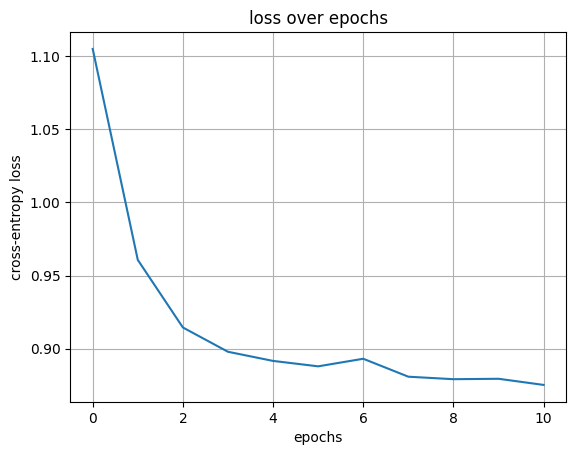

In [36]:
model_5layer_rmsprop = FlexibleMLP_RMSProp(
    input_size=X_train_np.shape[1],
    output_size=4,
    hidden_layers=[64, 48, 32, 16],
    epochs=50,
    eta = 0.001,
    minibatches=50,
    l2=0.1,
    random_state=42
)

model_5layer_rmsprop.fit(X_train_np, y_train_np.T, print_progress=5)

y_pred_rmsprop = model_5layer_rmsprop.predict(X_test_np)
acc_rmsprop = accuracy_score(y_test_np.argmax(axis=0), y_pred_rmsprop)

print(f"Test Accuracy (5-layer MLP with RMSProp): {acc_rmsprop:.4f}")
model_5layer_rmsprop.plot_loss()


**ANALYSIS:**

We used RMSProp as our adaptive learning method. It changes the learning rate for each weight based on how big the gradients are, which is supposed to help the model learn faster and more smoothly.

We tried RMSProp on our 5-layer model and compared it to the same model using regular gradient descent (SGD). We tested different learning rates (0.001, 0.0005, 0.0003), but RMSProp still gave us a lower test accuracy (about 64%), while the regular model got around 72%.

This means RMSProp didn’t help in our case. One reason might be that it was adjusting weights too carefully or focusing on parts of the model that didn’t matter much, which may have caused it to stop improving too early. It might have adjusted weights that worked better being adjusted less, in other words it might have overtuned some parameters. Our model might already work best with normal gradient descent, and RMSProp just added complexity without helping.

So even though RMSProp is useful in some cases, for our model and dataset, it didn’t improve performance.

**Exceptional Work (1 points total)**

In [37]:
import numpy as np

class FlexibleMLP_AdaDelta:
    def __init__(self, input_size, output_size, hidden_layers,
                 epochs=50, minibatches=50, l2=0.0, random_state=None, rho=0.95, epsilon=1e-6):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.epochs = epochs
        self.minibatches = minibatches
        self.l2 = l2
        self.random_state = random_state
        self.rho = rho
        self.epsilon = epsilon

        self.layers = [input_size] + hidden_layers + [output_size]
        self._init_weights()

    def _init_weights(self):
        np.random.seed(self.random_state)
        self.weights = []
        self.biases = []
        for i in range(len(self.layers) - 1):
            W = np.random.randn(self.layers[i + 1], self.layers[i]) * np.sqrt(2.0 / self.layers[i])
            b = np.zeros((self.layers[i + 1], 1))
            self.weights.append(W)
            self.biases.append(b)

    def _relu(self, Z): return np.maximum(0, Z)
    def _relu_deriv(self, Z): return Z > 0
    def _softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return expZ / np.sum(expZ, axis=0, keepdims=True)

    def _cross_entropy(self, y_true, y_pred):
        m = y_true.shape[1]
        return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

    def _forward(self, X):
        A = X.T
        self.zs = []
        self.activations = [A]
        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            Z = W @ A + b
            A = self._relu(Z)
            self.zs.append(Z)
            self.activations.append(A)
        Z = self.weights[-1] @ A + self.biases[-1]
        A = self._softmax(Z)
        self.zs.append(Z)
        self.activations.append(A)
        return A

    def _backward(self, X, y_true):
        grads_W = [None] * len(self.weights)
        grads_b = [None] * len(self.biases)
        m = y_true.shape[1]
        delta = self.activations[-1] - y_true
        for i in reversed(range(len(self.weights))):
            A_prev = self.activations[i]
            grads_W[i] = delta @ A_prev.T / m + self.l2 * self.weights[i]
            grads_b[i] = np.sum(delta, axis=1, keepdims=True) / m
            if i != 0:
                delta = (self.weights[i].T @ delta) * self._relu_deriv(self.zs[i - 1])
        return grads_W, grads_b

    def fit(self, X, y, print_progress=10):
        m = X.shape[0]
        batch_size = m // self.minibatches
        self.loss_history = []

        Eg2 = {}  # squared grads
        Edx2 = {}  # squared updates

        for i in range(len(self.weights)):
            Eg2[f"W{i}"] = np.zeros_like(self.weights[i])
            Edx2[f"W{i}"] = np.zeros_like(self.weights[i])
            Eg2[f"b{i}"] = np.zeros_like(self.biases[i])
            Edx2[f"b{i}"] = np.zeros_like(self.biases[i])

        for epoch in range(1, self.epochs + 1):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for batch in range(self.minibatches):
                start = batch * batch_size
                end = start + batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end].T

                A = self._forward(X_batch)
                grads_W, grads_b = self._backward(X_batch, y_batch)

                for i in range(len(self.weights)):
                    # update for weights
                    Eg2[f"W{i}"] = self.rho * Eg2[f"W{i}"] + (1 - self.rho) * (grads_W[i] ** 2)
                    update_W = (np.sqrt(Edx2[f"W{i}"] + self.epsilon) /
                                np.sqrt(Eg2[f"W{i}"] + self.epsilon)) * grads_W[i]
                    self.weights[i] -= update_W
                    Edx2[f"W{i}"] = self.rho * Edx2[f"W{i}"] + (1 - self.rho) * (update_W ** 2)

                    # update for biases
                    Eg2[f"b{i}"] = self.rho * Eg2[f"b{i}"] + (1 - self.rho) * (grads_b[i] ** 2)
                    update_b = (np.sqrt(Edx2[f"b{i}"] + self.epsilon) /
                                np.sqrt(Eg2[f"b{i}"] + self.epsilon)) * grads_b[i]
                    self.biases[i] -= update_b
                    Edx2[f"b{i}"] = self.rho * Edx2[f"b{i}"] + (1 - self.rho) * (update_b ** 2)

            if epoch % print_progress == 0 or epoch == 1:
                A_final = self._forward(X)
                loss = self._cross_entropy(y.T, A_final)
                self.loss_history.append(loss)
                print(f"epoch {epoch}: loss = {loss:.4f}")

    def predict(self, X):
        probs = self._forward(X)
        return np.argmax(probs, axis=0)

    def plot_loss(self):
        import matplotlib.pyplot as plt
        plt.plot(self.loss_history)
        plt.title("loss over epochs")
        plt.xlabel("epochs")
        plt.ylabel("cross-entropy loss")
        plt.grid(True)
        plt.show()


epoch 1: loss = 0.9697
epoch 5: loss = 0.9457
epoch 10: loss = 1.0182
epoch 15: loss = 0.9075
epoch 20: loss = 0.9265
epoch 25: loss = 0.8900
epoch 30: loss = 0.8978
epoch 35: loss = 0.8758
epoch 40: loss = 0.8781
epoch 45: loss = 0.8897
epoch 50: loss = 0.8715
Test Accuracy (5-layer MLP with AdaDelta): 0.6385


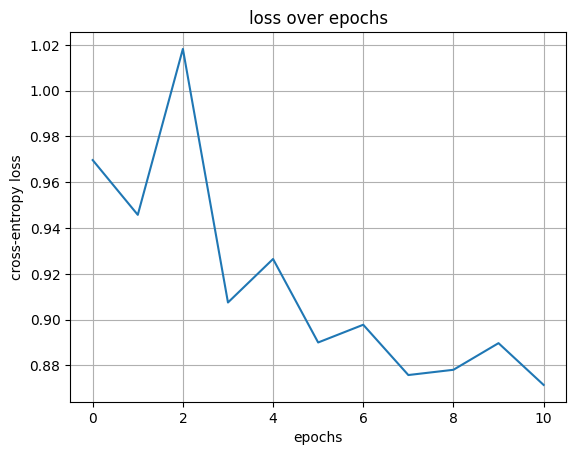

In [38]:
model_5layer_adadelta = FlexibleMLP_AdaDelta(
    input_size=X_train_np.shape[1],
    output_size=4,
    hidden_layers=[64, 48, 32, 16],
    epochs=50,
    minibatches=50,
    l2=0.1,
    random_state=42
)

model_5layer_adadelta.fit(X_train_np, y_train_np.T, print_progress=5)

y_pred_adadelta = model_5layer_adadelta.predict(X_test_np)
acc_adadelta = accuracy_score(y_test_np.argmax(axis=0), y_pred_adadelta)

print(f"Test Accuracy (5-layer MLP with AdaDelta): {acc_adadelta:.4f}")
model_5layer_adadelta.plot_loss()

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(X_train_np, y_train_np.T, epochs=50, batch_size=32, verbose=1)

loss_adam, acc_adam = model_adam.evaluate(X_test_np, y_test_np.T, verbose=0)
print(f"Test Accuracy (5-layer MLP with Adam): {acc_adam:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6180 - loss: 0.8479
Epoch 2/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7241 - loss: 0.6330
Epoch 3/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7277 - loss: 0.6187
Epoch 4/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7323 - loss: 0.6061
Epoch 5/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7358 - loss: 0.5999
Epoch 6/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7393 - loss: 0.5943
Epoch 7/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7377 - loss: 0.5901
Epoch 8/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7393 - loss: 0.5910
Epoch 9/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7406 - loss: 0.5837
Epoch 10/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7417 - loss: 0.5815
Epoch 11/50
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7436 - loss: 0.5780
Epoch 12/50
1818/1818 ━━━━━━━━

**ANALYSIS**

We implemented two adaptive learning techniques to improve the performance of our 5-layer neural network. First, we manually implemented AdaDelta, which adjusts the learning rate based on past gradients and updates. During training, the loss decreased slowly over time, but the final test accuracy was only 63.9%, which was lower than our previous models. This suggests that AdaDelta may not have been the best fit for our dataset or network structure. Next, we used Adam, a more advanced optimizer that combines momentum and adaptive learning rates. With Adam, the model trained much more efficiently — we saw accuracy rise steadily and reach around 77% on the training set by epoch 43, and the test accuracy reached 71.3%, making it one of our best-performing models. This shows that Adam helped the model converge faster and perform better overall compared to other approaches we tried.

In [41]:
# Save your current notebook as HTML
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/ML/ML_LAB4/ML_LAB4.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ML/ML_LAB4/ML_LAB4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 968723 bytes to /content/drive/MyDrive/Colab Notebooks/ML/ML_LAB4/ML_LAB4.html


In [42]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/ML/ML_LAB4/ML_LAB4.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>